In [ ]:
import pandas as pd

In [ ]:
from sqlalchemy import create_engine

engine = create_engine('sqlite://', echo=False)

In [ ]:
from os.path import exists

day = 0
file = 'checkout_1.csv'
while exists(file):
  df = pd.read_csv(file)

  if (day == 0):
    df['day'] = day + 1
    df['sales'] = df['yesterday']
    pd.DataFrame(df, columns=['day','time','sales']).to_sql('checkouts', con=engine)
    day = day + 1

  df['day'] = day + 1
  df['sales'] = df['today']
  pd.DataFrame(df, columns=['day','time','sales']).to_sql('checkouts', con=engine, if_exists='append')
  day = day + 1
  file = 'checkout_'+ str(day) +'.csv'

In [ ]:
from sqlalchemy.sql import text

with engine.connect() as conn:
    query = conn.execute(text('''SELECT * FROM checkouts;'''))

df = pd.DataFrame(query.fetchall())

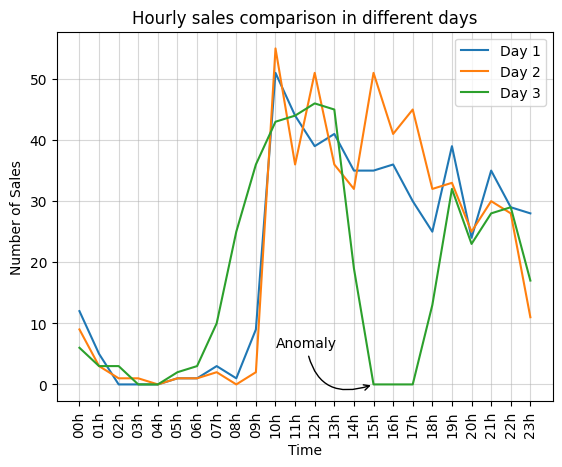

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

days = list(range(1, df['day'].max() + 1))

for day in days:
  day_data = df[df['day'] == day]
  ax.plot(day_data['time'], day_data['sales'], label="Day {}".format(day))

ax.grid(visible=True, alpha=0.4)
ax.grid(visible=True, linestyle='-', alpha=0.5)

plt.xlabel('Time')
plt.ylabel('Number of Sales')
plt.title('Hourly sales comparison in different days')
plt.legend()

plt.setp(ax.get_xticklabels(), rotation=90, ha="center")

ax.annotate('Anomaly', xy=(15,0), xytext=(10,6), arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=0.6'))

plt.show()


The graph indicates that there was likely some issue between 14h and 19h. The number of transactions at 14h is lower compared to the number of transactions at the same time the previous day and the same day of the week prior. Additionally, there are no transactions recorded at 15h, 16h, 17h and they only resume at 18h. Even at 18h, the number of transactions is lower than the previous day and the same day of the week prior.